##  Name : Anthony Awobasivwe

In [1]:
#Code to install any missing libraries which are used
import importlib

# List of required libraries
required_libraries = [
    "pandas",
    "numpy",
    "seaborn",
    "time",
    "matplotlib",
    "pickle",
    "sklearn",
    "xgboost",
]

# Iterate over required libraries and install if missing
for lib in required_libraries:
    try:
        importlib.import_module(lib)
    except ImportError:
        print(f"Installing {lib}...")
        try:
            import pip
            pip.main(["install", lib])
        except AttributeError:
            import subprocess
            subprocess.call(["python -m pip", "install", lib])
        print(f"{lib} installed successfully.")

In [2]:
#imports
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import time
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.calibration import CalibratedClassifierCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score ,StratifiedKFold
from sklearn import tree
from sklearn.metrics import classification_report , confusion_matrix,accuracy_score ,  roc_curve ,  roc_auc_score
pd.set_option('display.max_columns', 35)

In [3]:
df = pd.read_csv('modelling_challenge.csv')

In [4]:
len(df)

30432

In [5]:
df.head()

,player_id,play_measure3,skill6,play_measure6,skill3,equipment1,location3,location1,skill9,skill8,social1,quests1,location2,skill7,script3,play_measure4,play_measure2,skill4,skill10,skill12,gathering1,skill5,skill2,skill1,play_measure7,script2,trader,skill11,location4,quests2,gathering2,skill13,skill14,label
0,0,43.088820,0.000000,0.0,0.000000,0.869391,0.000000,0.000066,0.000000,0.015904,0.002611,0.000016,0.000000,0.000000,0.196176,0.000000,0.0,0.006134,0.000000,0.000000,938.980137,0.000000,7.089759,0.000000,0.000020,0.002923,24.243813,0.0,0.000000,0.000000,0.000000,0.0,1,0
1,1,6.485932,19.754987,0.0,0.153287,1.527241,0.000000,0.022267,1.701927,0.000000,0.000944,0.000000,0.031287,0.030838,0.351922,0.106353,0.0,0.001433,0.000000,0.000000,-0.546295,0.068509,0.000000,0.034194,0.000378,0.003471,-0.154919,0.0,0.000047,0.006730,12.283297,0.0,1,0
2,2,217.967794,0.008938,0.0,0.018133,0.569748,0.000386,0.001080,0.008131,0.029036,0.000579,0.007798,0.036649,1.713292,0.063770,0.000000,0.0,0.000819,0.009210,0.009538,-9.042609,2.071442,0.150077,3.489534,0.040988,0.009967,4760.418024,0.0,0.000022,0.000067,0.095655,0.0,1,0
3,3,4.401437,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.487730,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,1,0
4,4,140.079290,1.413419,0.0,0.017494,0.969912,0.000990,0.006355,0.075989,0.540840,0.003288,0.002601,0.065030,0.021372,0.190573,0.000000,0.0,0.000433,0.113378,0.016689,-335.194602,1.114146,0.685840,0.289354,0.003883,0.017700,-1585.875502,0.0,0.000093,0.000400,0.152423,0.0,1,0


In [6]:
#list all columns in dataset
df.columns

Index(['player_id', 'play_measure3', 'skill6', 'play_measure6', 'skill3',
       'equipment1', 'location3', 'location1', 'skill9', 'skill8', 'social1',
       'quests1', 'location2', 'skill7', 'script3', 'play_measure4',
       'play_measure2', 'skill4', 'skill10', 'skill12', 'gathering1', 'skill5',
       'skill2', 'skill1', 'play_measure7', 'script2', 'trader', 'skill11',
       'location4', 'quests2', 'gathering2', 'skill13', 'skill14', 'label'],
      dtype='object')

In [7]:
len(df.columns)

34

## Exploratory Data Analysis and Data Preparation

<Axes: xlabel='label', ylabel='count'>

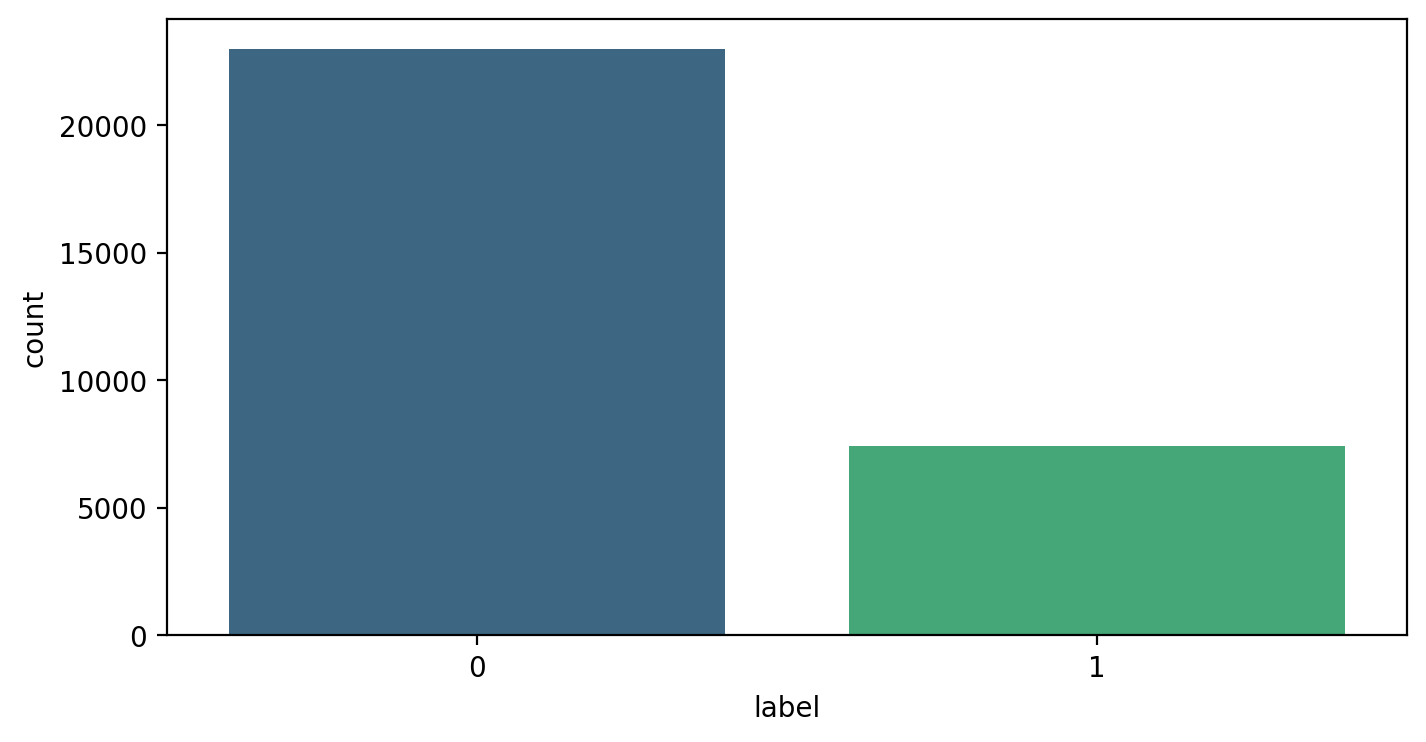

In [8]:
#check class representation
plt.figure(figsize=(8,4),dpi=200)
sns.countplot(data=df,x='label',palette='viridis')

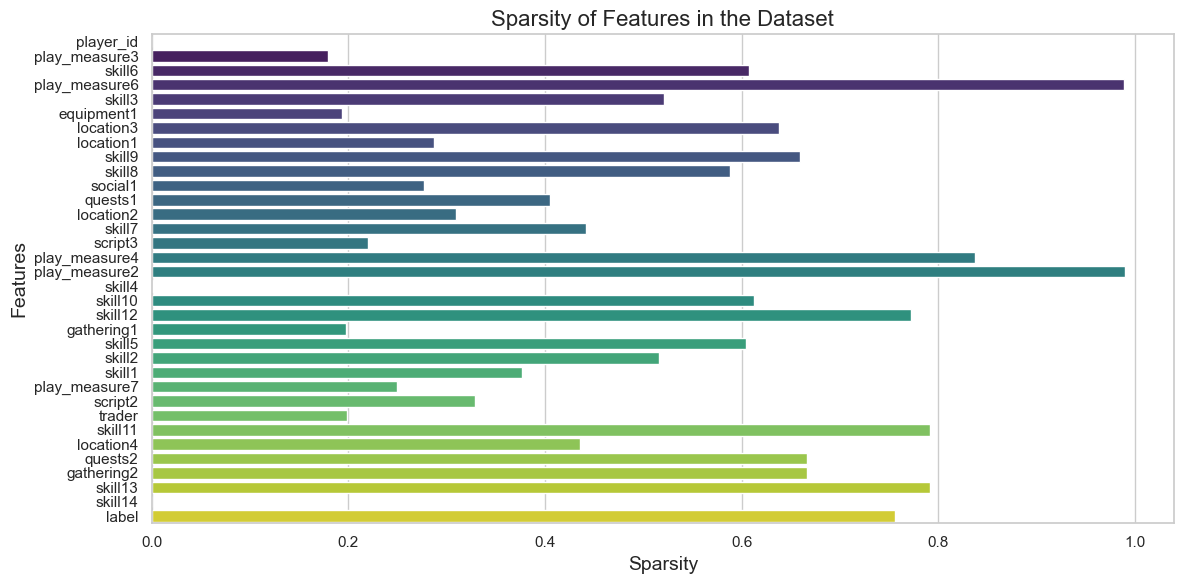

In [9]:
# Calculate feature sparsity
feature_sparsity = df.apply(lambda column: (column == 0).mean())

# Create a new DataFrame to store the results
sparsity_df = pd.DataFrame({'Feature': feature_sparsity.index, 'Sparsity': feature_sparsity.values})

# Set the style 
sns.set(style="whitegrid")

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Create a bar plot with horizontal bars for better readability
sns.barplot(x='Sparsity', y='Feature', data=sparsity_df, ax=ax, palette="viridis")

# Set labels and title
ax.set_xlabel('Sparsity', fontsize=14)
ax.set_ylabel('Features', fontsize=14)
ax.set_title('Sparsity of Features in the Dataset', fontsize=16)

 

# Adjust spacing
plt.tight_layout()

# Show the plot
plt.show()


The feature set displays a notable degree of sparsity, with a substantial number of features exceeding the 50th percentile threshold. This sparsity will be taken into account during model selection.

In [10]:
# Identify redundant columns
redundant_cols = [col for col in df.columns if df[col].nunique() == 1]
redundant_cols

['skill14']

In [11]:
#drop redundant column ('skill14')
df = df.drop(columns=redundant_cols)

### Missing Value Checks

In [12]:
#check for missing values in each column
df.isna().sum()

player_id          0
play_measure3      0
skill6             0
play_measure6      0
skill3           311
equipment1         0
location3          0
location1          0
skill9           344
skill8             0
social1            0
quests1          333
location2          0
skill7             0
script3            0
play_measure4      0
play_measure2      0
skill4             0
skill10            0
skill12            0
gathering1         0
skill5             0
skill2             0
skill1             0
play_measure7      0
script2            0
trader             0
skill11            0
location4          0
quests2            0
gathering2         0
skill13            0
label              0
dtype: int64

In [13]:
#check if any rows contain 3 missing values in its columns
len(df[df.isna().sum(axis=1) >= 3].index)



0

Given the current absence of domain-specific knowledge, we replace missing values in each row with the most frequently occurring value within each respective column. This increases the sparsity of the features, however it seems to be the best solution at present given the lack of domain knowledge of what these values represent.

In [14]:
#Replace missing values with the respective column's most frequent value (0.000000).
df.fillna(0.000000, inplace=True)

In [15]:
#check no more missing values present
df.isna().sum()

player_id        0
play_measure3    0
skill6           0
play_measure6    0
skill3           0
equipment1       0
location3        0
location1        0
skill9           0
skill8           0
social1          0
quests1          0
location2        0
skill7           0
script3          0
play_measure4    0
play_measure2    0
skill4           0
skill10          0
skill12          0
gathering1       0
skill5           0
skill2           0
skill1           0
play_measure7    0
script2          0
trader           0
skill11          0
location4        0
quests2          0
gathering2       0
skill13          0
label            0
dtype: int64

### Outlier Checks

In [16]:
# group continous and discrete columns
discrete_cols = ['player_id', 'label']
continuous_cols = [col for col in df.columns if col not in discrete_cols]

In [17]:
# Initialize an empty list to store DataFrames for each continuous column's outlier counts
outlier_dfs = []

# Check outliers for the continous columns using the IQR rule
for col in continuous_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Determine bounds for mild outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Determine bounds for extreme outliers
    extreme_lower = Q1 - 3 * IQR
    extreme_upper = Q3 + 3 * IQR

    # Count the number of mild and extreme outliers in the column
    mild_outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
    extreme_outliers = ((df[col] < extreme_lower) | (df[col] > extreme_upper)).sum()

    # Create a DataFrame capturing outlier counts for the current colum
    col_outliers = pd.DataFrame({'Column Name': [col], 'Mild Outlier': [mild_outliers], 'Extreme Outlier': [extreme_outliers]})

    # Add the outlier counts DataFrame to the list
    outlier_dfs.append(col_outliers)

# Concatenate the individual DataFrames into a single result DataFrame
outlier_counts = pd.concat(outlier_dfs, ignore_index=True)

# display the resulting DataFrame
outlier_counts


,Column Name,Mild Outlier,Extreme Outlier
0,play_measure3,1479,363
1,skill6,6610,6038
2,play_measure6,326,326
3,skill3,5119,4415
4,equipment1,2193,819
5,location3,4933,4202
6,location1,2592,1275
7,skill9,6617,6237
8,skill8,6352,4996
9,social1,3543,2364


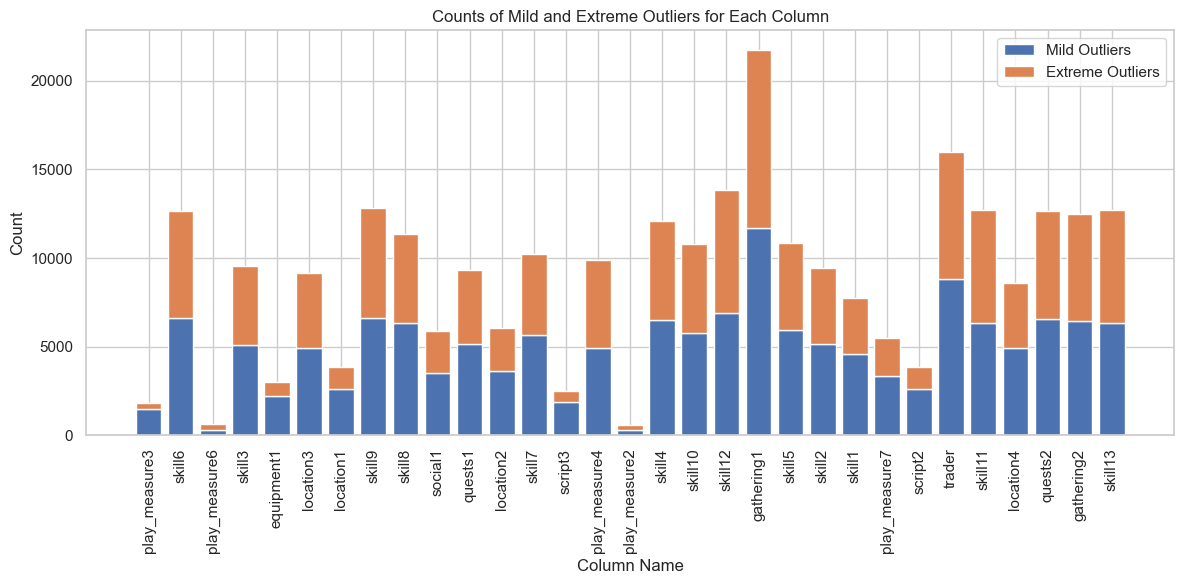

In [18]:
# Create a bar plot for Mild and Extreme Outliers on the same plot
plt.figure(figsize=(12, 6))
plt.bar(outlier_counts['Column Name'], outlier_counts['Mild Outlier'], label='Mild Outliers')
plt.bar(outlier_counts['Column Name'], outlier_counts['Extreme Outlier'], bottom=outlier_counts['Mild Outlier'], label='Extreme Outliers')
plt.xlabel('Column Name', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Counts of Mild and Extreme Outliers for Each Column')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


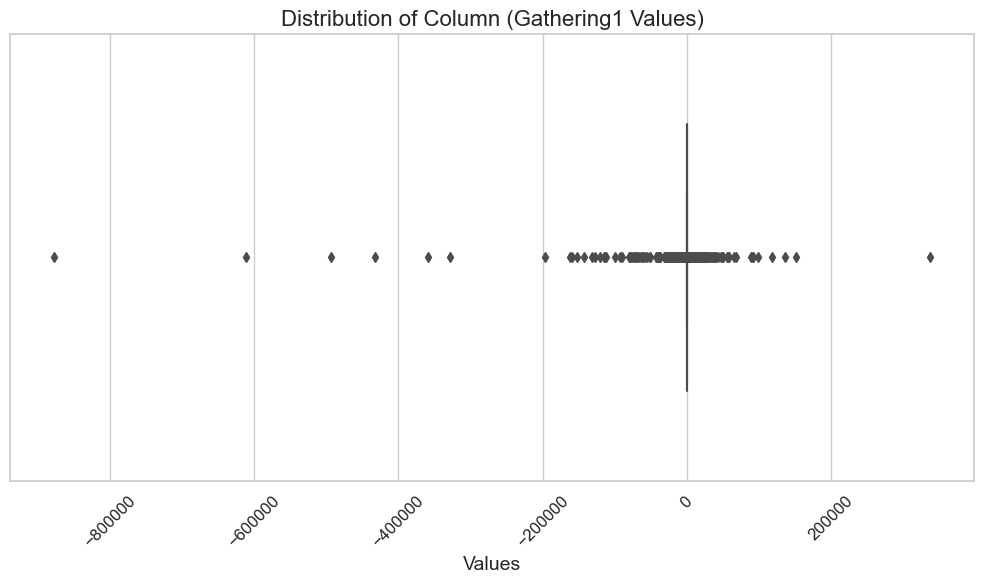

In [19]:
# Plot investigating the column with the highest number of outliers (gathering1)
plt.figure(figsize=(10, 6))

# Use the "whitegrid" style for this specific plot
with sns.axes_style("whitegrid"):
    # Create the box plot with custom width and palette
    sns.boxplot(x='gathering1', data=df, width=0.6)

# Add a title, axis labels, and rotate x-axis labels
plt.title('Distribution of Column (Gathering1 Values)', fontsize=16)
plt.xlabel('Values', fontsize=14)
plt.xticks(rotation=45, fontsize=12)

# Show the plot
plt.tight_layout()


From the above box plot, it is evident that the presence of a high number of 0.000000 values in several columns leads to a skewed distribution, resulting in a high number of outliers. Furthermore, since there is currently no domain-specific knowledge available to interpret these numeric values, the outliers will be left as is.

### Principal Component Analysis

In [20]:
# store continuous features in new defined variable
x = df.loc[:, continuous_cols].values
# Standardizing the features
scaler = StandardScaler()
X = scaler.fit_transform(x)

In [21]:
#define PCA model to use
pca = PCA()

#fit PCA model to data
pca_fit = pca.fit(X)

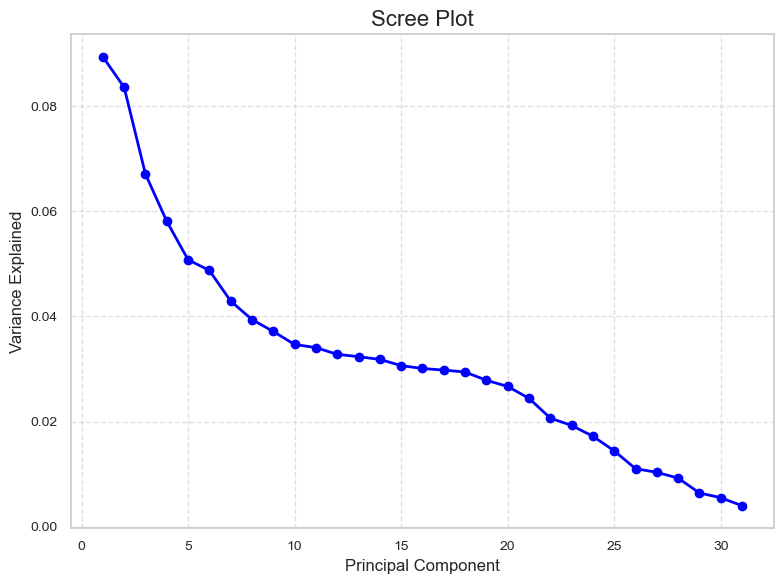

In [22]:
# Generate a sequence of principal component numbers
PC_values = np.arange(pca.n_components_) + 1

# Plot
plt.figure(figsize=(8, 6))
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue') # Plot the variance explained by each principal component
plt.title('Scree Plot', fontsize=16)
plt.xlabel('Principal Component', fontsize=12)
plt.ylabel('Variance Explained', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6) # set grid lines and line style
plt.tight_layout()

# Show plot
plt.show()

In [23]:
print(pca.explained_variance_ratio_)

[0.08944367 0.08363268 0.06711281 0.0581231  0.05080359 0.04876442
 0.04293717 0.03941227 0.03714709 0.03467091 0.03407831 0.03279289
 0.03235172 0.03182489 0.03064437 0.0300964  0.02979375 0.02943135
 0.02785401 0.02668212 0.02441935 0.02065719 0.01925134 0.01720392
 0.01441487 0.01102234 0.01033003 0.00923031 0.00640291 0.00549986
 0.00397036]


In [24]:
#sum first 15 pca components yielded roughly a 71 percent explained variance
sum(pca.explained_variance_ratio_[0:15])


0.7137398934181547

In [25]:
from sklearn.decomposition import PCA

# Initializing the PCA object to reduce the data to 15 principal components
pca = PCA(n_components=15)

# fit transform standardised data
principalComponents = pca.fit_transform(X)

# store pca data as a new dataframe
pcaDf = pd.DataFrame(data = principalComponents
             , columns=['pc1', 'pc2', 'pc3',
                              'pc4', 'pc5', 'pc6',
                              'pc7', 'pc8', 'pc9','pc10','pc11','pc12','pc13','pc14','pc15'])

In [26]:
#concatenate pca df with the class labels and store as new dataframe
df_pca = pd.concat([pcaDf, df[['label']]], axis = 1)

In [27]:
df_pca

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,label
0,-0.254454,-0.065272,0.065599,0.072534,-0.146944,0.645599,0.434824,-1.327872,0.746762,-0.050914,-0.285390,-0.803926,-0.594594,0.964182,1.075795,0
1,1.807647,-0.675967,-1.144691,0.047896,-1.710794,1.590887,-0.339888,0.358051,-3.126562,-0.280496,-0.881095,0.003848,3.777636,-0.302262,-0.599878,0
2,0.991312,-0.995761,2.069739,-2.049036,0.249991,-3.200240,0.970963,-0.258083,-0.213399,0.301278,-0.032379,-0.675706,-1.020548,-0.265736,-0.442355,0
3,-1.148596,0.415140,-0.561442,-0.184930,0.521903,0.582492,-0.134801,0.180812,-0.055596,0.623874,0.253429,-0.016876,0.071268,0.021385,0.233014,0
4,0.752591,-0.642090,0.814656,-0.418860,-0.074114,-0.246525,0.449785,-0.388382,0.071458,0.146007,-0.218376,-0.109904,-0.021492,0.211662,-0.004457,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30427,0.549310,-0.061281,-0.336898,-0.267844,-0.344777,1.868843,1.298315,0.598965,1.578633,-0.413812,0.168108,1.188787,-0.448303,-1.310497,-2.307526,1
30428,-0.547357,0.141297,-0.369737,0.012234,0.130195,0.836224,0.250649,0.427799,0.380581,-0.233912,0.046037,0.181486,-0.044360,-0.154598,-0.287287,1
30429,-1.083730,0.307754,0.346878,1.754306,0.141504,0.077040,0.148718,0.045522,-0.150014,-0.268538,0.341118,0.032997,0.056925,0.067040,-0.055181,1
30430,-1.099125,0.393144,-0.523153,-0.149915,0.415398,0.474740,-0.103343,0.100832,0.056206,-0.186812,-0.058296,-0.019701,0.087668,0.050555,0.081722,1


Through the application of PCA, dimensionality reduction was successfully accomplished by halving the number of feature columns from 31 to 15. This reduction in dimensions was achieved while retaining 71% of the explained variance, indicating the preservation of a significant amount of valuable information in the reduced dataset.

### Train Test Validation Splits

In [28]:
X = df_pca.drop('label',axis=1)
y = df_pca['label']

In [29]:
#train test validation splits (60/20/20)
X_train, X_other, y_train, y_other = train_test_split(X, y, test_size=0.4, random_state=100)
X_test, X_val, y_test, y_val = train_test_split(X_other, y_other, test_size=0.5, random_state=100)

## Modelling 

Based on the conducted EDA, it is evident that there is a significant class label imbalance, with a predominance of the 0 class. Additionally, the EDA reveals that the original feature set exhibits notable sparsity, characterized by a substantial number of zero values throughout the feature set. To address the challenges of class imbalance and high feature sparsity, Extreme Gradient Boosting (XGBoost) has been selected as the model of choice.

THe XGBoost model makes use of an ensemble of decision trees and gradient boosting to make predictions. The model has two key parameters which make it suitable for this particular problem. The weighting parameter(scale_pos_weight) which will be manaully calculated allows for assigning the weights of each class thereby handling class imbalance. The regularization parameter (alpha) which will be fine-tuned introduces a penalty term to the loss function which reduces sparsity in the feature set while helping to prevent overfitting. Other parameters to be fine-tined are maximum depth, total number of estimators and learning rate. The fine-tuning process will involve a grid search conducted within a stratified 5-fold cross-validation setting with weighted f1-score as the chosen scoring metric.

In [30]:
#This code counts the number of samples in each class, the ratio gotten is used as the weighting for the XGBoost model to combat class imbalance
num_negative_samples = len(y_train[y_train == 0])
num_positive_samples = len(y_train[y_train == 1])
imbalance_ratio = round(num_negative_samples/num_positive_samples,1)  

Best parameters for XGBoost:
{'alpha': 0.01, 'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 50}
XGBoost: 0.854335 (0.002316)
Time taken for XGBoost Grid Search (Seconds): 1173.46


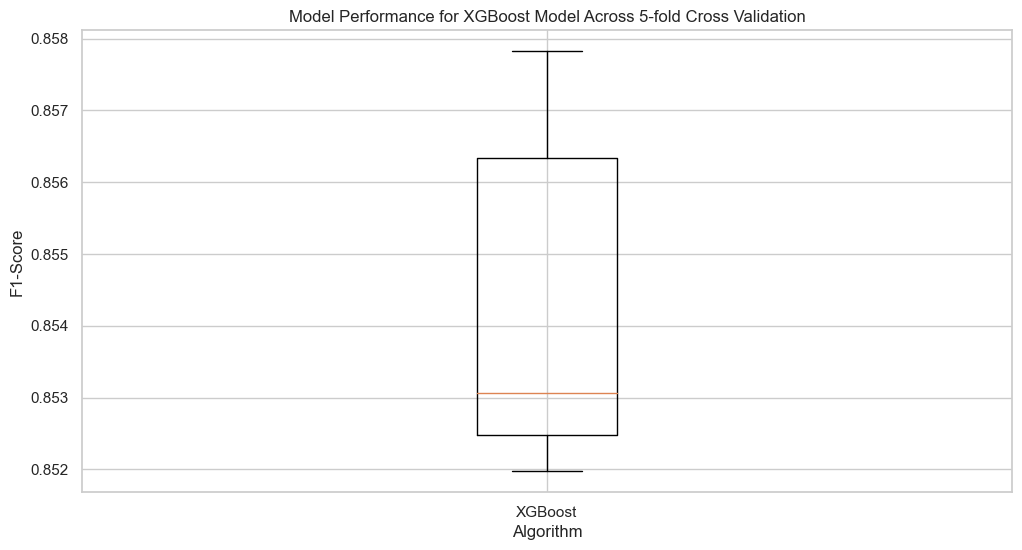

In [31]:
#As the models will be hypertuned we first define the parameter grid for each model
param_grid_xgb = {
    'n_estimators': [50, 100, 200,400], # sets the number of trees used in the ensemble
    'learning_rate': [0.01, 0.05, 0.1, 0.5], # sets the learning rate
    'max_depth': [5, 10, 15, 20], # sets the maximum depth of each tree in the ensemble
    'alpha': [0.01, 0.1, 0.5, 1] # sets the L1 regulirization penalty to the loss function for the absolute values of the model's coefficients.
}

 
# Append the list of models with their respective parameters
models = []
models.append(('XGBoost', XGBClassifier(scale_pos_weight= imbalance_ratio), param_grid_xgb))
 
# Perform grid search and evaluate each model in turn
results = []
names = []
best_estimators = []
start_time = time.time()
for name, model, param_grid in models:
    kfold = StratifiedKFold(n_splits=5, random_state=100, shuffle=True)
    
    # Perform grid search
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring='f1_weighted')
    grid_search.fit(X_train, y_train)
    best_estimator = grid_search.best_estimator_
    best_estimators.append(best_estimator)
    # Print the best parameters
    print(f'Best parameters for {name}:')
    print(grid_search.best_params_)
    
    # Evaluate the best estimator
    cv_results = cross_val_score(best_estimator, X_train, y_train, cv=kfold, scoring='f1_weighted')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    print(f'Time taken for {name} Grid Search (Seconds): {time.time() - start_time:.2f}')
# Customized plot
plt.figure(figsize=(12, 6))  # Adjust the figure size as desired
plt.boxplot(results, labels=names)
plt.title('Model Performance for XGBoost Model Across 5-fold Cross Validation')  # Customize the title
plt.xlabel('Algorithm')  # Customize the x-axis label
plt.ylabel('F1-Score')  # Customize the y-axis label
plt.show()


XGBoost): ROC AUC=0.817


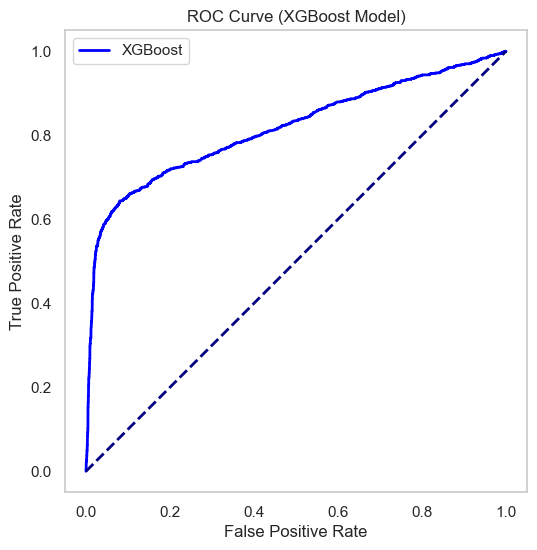

In [32]:
#Create new models with  the best parameters derived from the grid search
xgb = XGBClassifier(random_state=100, alpha = 0.01 , learning_rate =0.1, max_depth = 15, n_estimators =50 )
xgb.fit(X_train, y_train)
# predict probabilities for different models
xgb_probs = xgb.predict_proba(X_val)
# keep probabilities for the positive outcome only
xgb_probs = xgb_probs[:, 1]
xgb_auc = roc_auc_score(y_val, xgb_probs)
# summarize scores
print('XGBoost): ROC AUC=%.3f' % (xgb_auc))

 # Calculate the ROC curves
xgb_fpr, xgb_tpr, _ = roc_curve(y_val, xgb_probs)
# Plot the ROC curves with custom styling and thinner lines
plt.figure(figsize=(8, 6))
plt.plot(xgb_fpr, xgb_tpr, linestyle='-', color='blue', label='XGBoost', linewidth=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Axis labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (XGBoost Model)')

# Set the aspect ratio to be equal
plt.gca().set_aspect('equal')

# Show the legend
plt.legend()

# Show the plot
plt.grid()
plt.show()


## Save Model

In [33]:
with open('xgb_model.pkl', 'wb') as file:
    pickle.dump(xgb, file)

## Final Evaluation (Test Set)

In [34]:
with open('xgb_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
##Classification Report
xgb_preds = loaded_model.predict(X_test)
print(classification_report(y_test, xgb_preds))

              precision    recall  f1-score   support

           0       0.87      0.96      0.92      4591
           1       0.83      0.57      0.68      1495

    accuracy                           0.87      6086
   macro avg       0.85      0.77      0.80      6086
weighted avg       0.86      0.87      0.86      6086



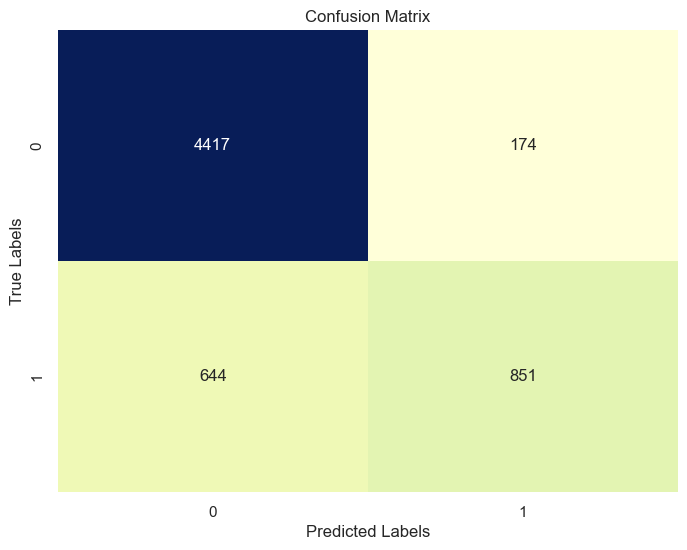

In [35]:
##Confusion matrix
cm = confusion_matrix(y_test,xgb_preds)
# Display confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='YlGnBu', fmt='d', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

The weighted model performance across all metrics is considerably high with scores in the 80's. From the classification report and confusion matrix, we however see a large disparity in performance between the 0 and 1 class. The zero class performed significantly better across all metrics leading to a high number of false negatives in the 1 class. This suggests the techniques used with the XGBoost model, although may have improved performance, still weren't adequate to reduce the disparity in performance between the two classes to a more acceptable level. With this in mind, if redoing this task in the future I would try out other methods for dealing with imbalanced data such as the use of over/under-sampling techniques like SMOTE.